# Python for Webscraping
* SOC 590: Big Data and Population Processes
* 17th October 2016

## Tutorial 2: Webscraping with a function

# Outline

1. Import modules
2. Examine html structure of a webpage
3. Use Beautiful Soup within a function
4. Analyze .csv of webpages as a Pandas DataFrame
5. Process data with regular expressions
6. Visualize data with Altair


* import relevant modules
* standard library modules:
    * [os](https://docs.python.org/3/library/os.html)
    * [urllib](https://docs.python.org/3/library/urllib.html)
    * [webbrowser](https://docs.python.org/3/library/webbrowser.html)
* open source modules:
    * [pandas](http://pandas.pydata.org)
    * [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
import os
import urllib
import webbrowser
import pandas as pd
from bs4 import BeautifulSoup

* open US News Rankings for Sociology webpage
* view page source to see html

In [2]:
url = 'http://grad-schools.usnews.rankingsandreviews.com/best-graduate-schools/top-humanities-schools/sociology-rankings/page+1'
webbrowser.open_new_tab(url)

True

* create a function to extract page data from US News 

In [3]:
def extract_page_data(table_rows):
    """
    Extract and return the the desired information from the td elements within
    the table rows.
    """
    # create the empty list to store the player data
    # <tr> tag: defines a row in a table 
    # <td> tag: defines a cell in a table
    rows = []
    for row in soup.findAll('tr'):
        rows.append([val.text for val in row.find_all('td')])
        
    return rows[1:]


* make empty lists for US News Rankings and errors

In [4]:
us_news_rankings = []
errors_list = []

* go through multiple web pages of US News Rankings 

In [5]:
url_template = 'http://grad-schools.usnews.rankingsandreviews.com/best-graduate-schools/top-humanities-schools/sociology-rankings/page+{page_number}'

# for each page from 1 to (and including) 4
for page_number in range(1, 5): 
    
    # Use try/except block to catch and inspect any urls that cause an error
    try:
        # get the webpage url
        url = url_template.format(page_number=page_number)

        # get the html
        html = urllib.request.urlopen(url)

        # create the BeautifulSoup object
        soup = BeautifulSoup(html, "lxml") 

        # get the column headers
        headers = [header.text for header in soup.findAll('th')]
        
        # start etracting rows
        table_rows = soup.select('td')[1:]
        
        school_data = extract_page_data(table_rows)
        
        # create the dataframe for the current page
        school_df = pd.DataFrame(school_data, columns=headers)
        school_df = pd.DataFrame(school_data)

        # append the current dataframe to the list of dataframes
        us_news_rankings.append(school_df)
    
    except Exception as e:
        # Store the url and the error it causes in a list
        error =[url, e] 
        # then append it to the list of errors
        errors_list.append(error)
    

* view possible urls that returned errors

In [6]:
print(len(errors_list))
errors_list

0


[]

* view list of appended dataframes
* concatenate dataframes into one .csv 

In [7]:
us_news_rankings

[                                                0  \
 0    \n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 1    \n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 2    \n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 3                 \n\ndblclick('rankingsEmbed')\n   
 4    \n\n#4Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 5    \n\n#4Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 6    \n\n#6Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 7    \n\n#6Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 8    \n\n#6Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 9       \n\n#9\n\n\nOverall Score: \n\n\n\n\n\n\n   
 10  \n\n#10Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 11  \n\n#10Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 12  \n\n#12Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 13  \n\n#12Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 14  \n\n#14Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 15  \n\n#14Tie\n\n\nOverall Score: \n\n\n\n\n\n\n   
 16     \n\n#16\n\n\nOverall Score: \n\n\n\n\n\n\n   
 17  \n\n#17Tie\n\n\nOverall

In [8]:
us_news_df_raw = pd.concat(us_news_rankings, axis=0)
column_headers = ["rank", "school", "score"]
us_news_df_raw.columns = column_headers

In [9]:
us_news_df_raw.head(10)

,rank,school,score
0,\n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,"\nPrinceton University \n\nPrinceton, NJ\n",\n\n \n\n \n\n ...
1,\n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,\nUniversity of California—​Berkeley \n\nBerke...,\n\n \n\n \n\n ...
2,\n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,\nUniversity of Wisconsin—​Madison \n\nMadison...,\n\n \n\n \n\n ...
3,\n\ndblclick('rankingsEmbed')\n,None,None
4,\n\n#4Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,"\nStanford University \n\nStanford, CA\n",\n\n \n\n \n\n ...
5,\n\n#4Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,\nUniversity of Michigan—​Ann Arbor \n\nAnn Ar...,\n\n \n\n \n\n ...
6,\n\n#6Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,"\nHarvard University \n\nCambridge, MA\n",\n\n \n\n \n\n ...
7,\n\n#6Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,"\nUniversity of Chicago \n\nChicago, IL\n",\n\n \n\n \n\n ...
8,\n\n#6Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,\nUniversity of North Carolina—​Chapel Hill \n...,\n\n \n\n \n\n ...
9,\n\n#9\n\n\nOverall Score: \n\n\n\n\n\n\n,\nUniversity of California—​Los Angeles \n\nLo...,\n\n \n\n \n\n ...


* make folders for raw_data and clean_data

In [10]:
if not os.path.exists('../data/raw_data'):
    os.makedirs('../data/raw_data')

if not os.path.exists('../data/clean_data'):
    os.makedirs('../data/clean_data')
    

In [11]:
# Write out the raw rankings data to the raw_data folder in the data folder
us_news_df_raw.to_csv("../data/raw_data/us_news_rankings_RAW.csv", index=False)

* read in raw .csv of US News Rankings with `Pandas`

In [12]:
us_news_df_raw = pd.read_csv("../data/raw_data/us_news_rankings_RAW.csv")
us_news_df_raw = us_news_df_raw[0:len(us_news_df_raw)]
us_news_df_raw.head()

,rank,school,score
0,\n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,"\nPrinceton University \n\nPrinceton, NJ\n",\n\n \n\n \n\n ...
1,\n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,\nUniversity of California—​Berkeley \n\nBerke...,\n\n \n\n \n\n ...
2,\n\n#1Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,\nUniversity of Wisconsin—​Madison \n\nMadison...,\n\n \n\n \n\n ...
3,\n\ndblclick('rankingsEmbed')\n,NaN,NaN
4,\n\n#4Tie\n\n\nOverall Score: \n\n\n\n\n\n\n,"\nStanford University \n\nStanford, CA\n",\n\n \n\n \n\n ...


* make new columns for school location and school name
* clean rank and score columns with regular expressions

In [13]:
us_news_df_raw["school_location"] = "NaN"
us_news_df_raw["school_name"] = "NaN"
us_news_df_raw["rank"] = us_news_df_raw.loc[:,('rank')].replace(r"\D",  "", regex = True)
us_news_df_raw["score"] = us_news_df_raw.loc[:,('score')].str.extract("(\d.\d)", expand=False)

In [14]:
us_news_df_raw.head(10)

,rank,school,score,school_location,school_name
0,1,"\nPrinceton University \n\nPrinceton, NJ\n",4.7,NaN,NaN
1,1,\nUniversity of California—​Berkeley \n\nBerke...,4.7,NaN,NaN
2,1,\nUniversity of Wisconsin—​Madison \n\nMadison...,4.7,NaN,NaN
3,,NaN,NaN,NaN,NaN
4,4,"\nStanford University \n\nStanford, CA\n",4.6,NaN,NaN
5,4,\nUniversity of Michigan—​Ann Arbor \n\nAnn Ar...,4.6,NaN,NaN
6,6,"\nHarvard University \n\nCambridge, MA\n",4.5,NaN,NaN
7,6,"\nUniversity of Chicago \n\nChicago, IL\n",4.5,NaN,NaN
8,6,\nUniversity of North Carolina—​Chapel Hill \n...,4.5,NaN,NaN
9,9,\nUniversity of California—​Los Angeles \n\nLo...,4.4,NaN,NaN


* fill in the school name and school location columns with regular expressions
    * split the school column to create two new columns

In [15]:
for i in range(0,len(us_news_df_raw)+1):
    try: 
        us_news_df_raw["school_name"][i] = us_news_df_raw["school"].str.split("\n\n")[i][0]
        us_news_df_raw["school_location"][i] = us_news_df_raw["school"].str.split("\n\n")[i][1]
    except:
        us_news_df_raw["school_name"][i] = "NaN"
        us_news_df_raw["school_location"][i] = "NaN"
us_news_df_raw["school_name"] = us_news_df_raw.loc[:,('school_name')].replace(r"\n",  "", regex = True)
us_news_df_raw["school_location"] = us_news_df_raw.loc[:,('school_location')].replace("\n",  "", regex = True)

In [16]:
cols = ["rank", "school_name", "school_location", "score"]
us_news_df_raw = us_news_df_raw[cols]
us_news_df_raw.head()

,rank,school_name,school_location,score
0,1,Princeton University,"Princeton, NJ",4.7
1,1,University of California—​Berkeley,"Berkeley, CA",4.7
2,1,University of Wisconsin—​Madison,"Madison, WI",4.7
3,,NaN,NaN,NaN
4,4,Stanford University,"Stanford, CA",4.6


* drop observations that are empty rows (NaN observations on school name column)

In [17]:
us_news_df_clean = us_news_df_raw[us_news_df_raw['school_name']!="NaN"]
us_news_df_clean.head()

,rank,school_name,school_location,score
0,1,Princeton University,"Princeton, NJ",4.7
1,1,University of California—​Berkeley,"Berkeley, CA",4.7
2,1,University of Wisconsin—​Madison,"Madison, WI",4.7
4,4,Stanford University,"Stanford, CA",4.6
5,4,University of Michigan—​Ann Arbor,"Ann Arbor, MI",4.6


* save clean .csv to file

In [18]:
us_news_df_clean.to_csv("../data/clean_data/us_news_rankings_clean.csv")

In [19]:
from geopy.geocoders import Nominatim

In [20]:
geolocator = Nominatim()
locations = us_news_df_clean['school_location'].apply(lambda x: geolocator.geocode(x)) # equiv to df.sum(0)
address,coordinates  = zip(*locations)
latitude,longitude = zip(*coordinates)

In [21]:
us_news_df_clean.loc[:,'latitude'] = latitude
us_news_df_clean.loc[:,('longitude')] = longitude
us_news_df_clean = us_news_df_clean.apply(pd.to_numeric, errors="ignore")
us_news_df_clean.head()

/Users/kivan/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kivan/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,rank,school_name,school_location,score,latitude,longitude
0,1.0,Princeton University,"Princeton, NJ",4.7,40.349274,-74.659296
1,1.0,University of California—​Berkeley,"Berkeley, CA",4.7,37.870839,-122.272864
2,1.0,University of Wisconsin—​Madison,"Madison, WI",4.7,43.074761,-89.383761
4,4.0,Stanford University,"Stanford, CA",4.6,37.426565,-122.170188
5,4.0,University of Michigan—​Ann Arbor,"Ann Arbor, MI",4.6,42.268157,-83.731229


In [22]:
us_news_df_clean['quintile'] = pd.qcut(us_news_df_clean['score'], 5, labels=False)

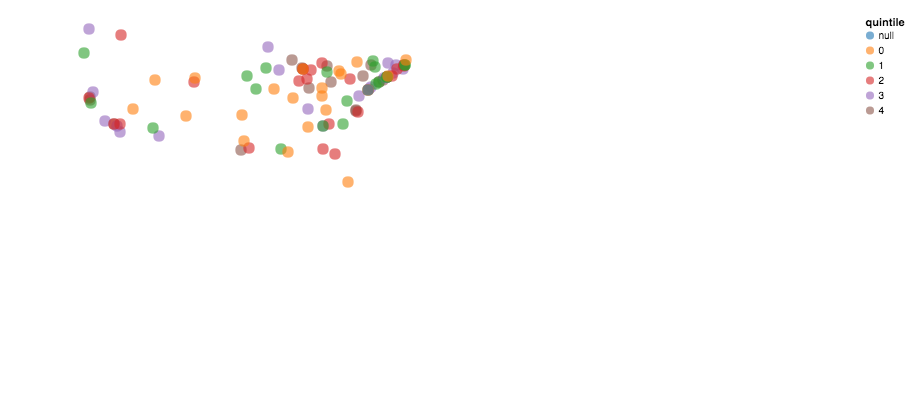

In [23]:
from altair import Chart, X, Y, Axis, Scale

Chart(us_news_df_clean).mark_circle(
    size=100,
    opacity=0.6
).encode(
    x=X('longitude:Q', axis=Axis(title=' ')),
    y=Y('latitude:Q', axis=Axis(title=' ')),
        #scale=Scale(domain=(-60, 80))),
    color='quintile:N',
).configure_cell(
    width=800,
    height=350
).configure_axis(
    grid=False,
    axisWidth=0,
    tickWidth=0,
    labels=False,

)

# Review
In this tutorial, we learned how to examine the html structure of webpage and use a function based on the `Beautiful Soup` module to parse tables on multiple webpage into .csv. After creating a .csv of all webpage tables, we analyzed the .csv using the `Pandas` module. Lastly, we created vizualizations with the Altair library

In [24]:
import sys
import altair
import bs4
print("System and module version information: \n")
print('Python version:', sys.version_info)
print('urllib.request version:', urllib.request.__version__)
print('pandas version:', pd.__version__)
print('altair version:',altair.__version__)
print('Beautiful Soup version:', bs4.__version__)

System and module version information: 

Python version: sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
urllib.request version: 3.5
pandas version: 0.18.1
altair version: 1.0.0
Beautiful Soup version: 4.5.1
